#Radhakrishna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("q_quora.csv")

<ipython-input-2-494d7ae2a38a>:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("q_quora.csv")


In [3]:
df.shape

(404351, 13)

In [4]:
df.drop(df.columns[6:], axis=1, inplace=True)


In [5]:
df.iloc[500:1000]

,id,qid1,qid2,question1,question2,is_duplicate
500,500,1001,1002,What does it mean when a guy says I like you?,"What does it mean when a guy says ""Be safe""?",0
501,501,1003,1004,"What makes a programmer ""good?""",What makes a good programmer great?,1
502,502,1005,1006,What will most likely cause World War III?,Is World War III imminent?,0
503,503,1007,1008,Is civil war likely after the US presidential ...,Is the US at risk of some type of uprising aft...,1
504,504,1009,1010,Which European country is the best for asylum ...,What are the best countries for whistleblowers...,0
...,...,...,...,...,...,...
995,995,1991,1992,I am a straight A student but have no motivati...,My fiancée died recently and it pains my heart...,0
996,996,1993,1994,Which is the best shares to purchase and sale ...,"In Sydney, which company would be the best to ...",0
997,997,1995,1996,I and my girlfriends private partstouched each...,Why most of the cosmetic products don't have p...,0
998,998,1997,1998,Could we use cherenkov atmosphere radiation (w...,Can we map the surface (and the subsurface) of...,1


In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
# Apply a function to convert all non '0'/'1' values to 0 and convert the result to an integer
df['is_duplicate'] = df['is_duplicate'].apply(lambda x: 0 if str(x) not in ['0', '1'] else int(x))

# Check the unique values after cleaning
print(df['is_duplicate'].unique())


[0 1]


In [8]:
new_df = df.sample(3000)

In [9]:
new_df.shape

(3000, 6)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
367724,367724,719698,719699,How can I start my study plan for IAS?,What's the process to start study of IAS?,1
133701,133701,264773,264774,What's the most effective way to ask a questio...,What is the most effective way to write a Quor...,1
7129,7129,14240,14241,Why do people cheat on their partners?,Do you want to know if your spouse is cheating...,0
199769,199769,394238,394239,Why did Trump win?,Why did Donald Trump win the election?,1
172025,172025,137549,339908,What does Shiva's cosmic dance mean?,Is Lord Ganesha a cosmic Leader?,0


In [11]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [12]:
new_df.duplicated().sum()

0

#find the value of each type of question pair

#converting as an integer

In [13]:
df['is_duplicate'] = df['is_duplicate'].astype(int)


In [14]:
# Distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())


is_duplicate
0    255084
1    149267
Name: count, dtype: int64


is_duplicate
0    63.084795
1    36.915205
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

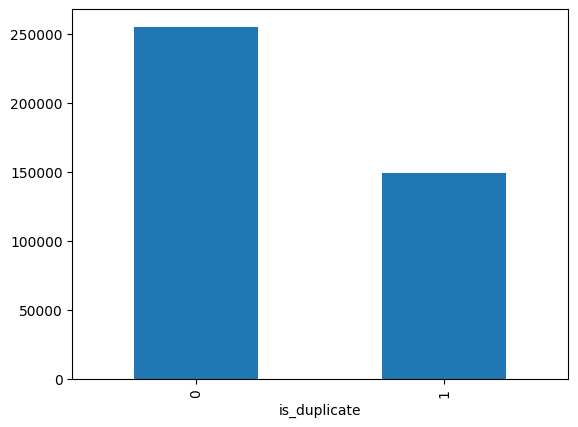

In [15]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

#reapeated question

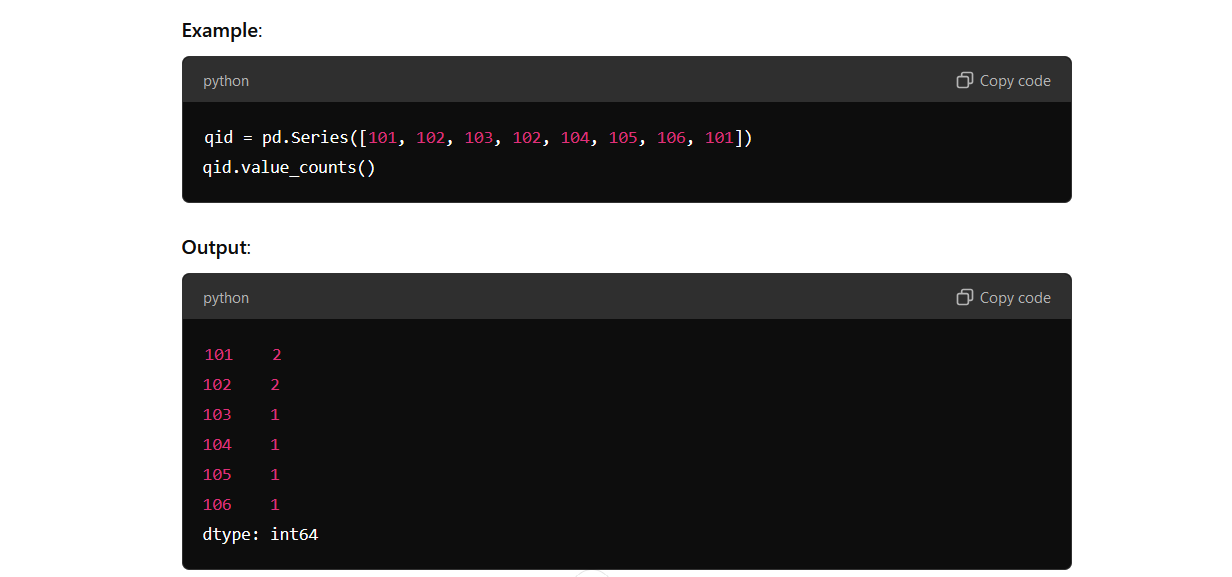

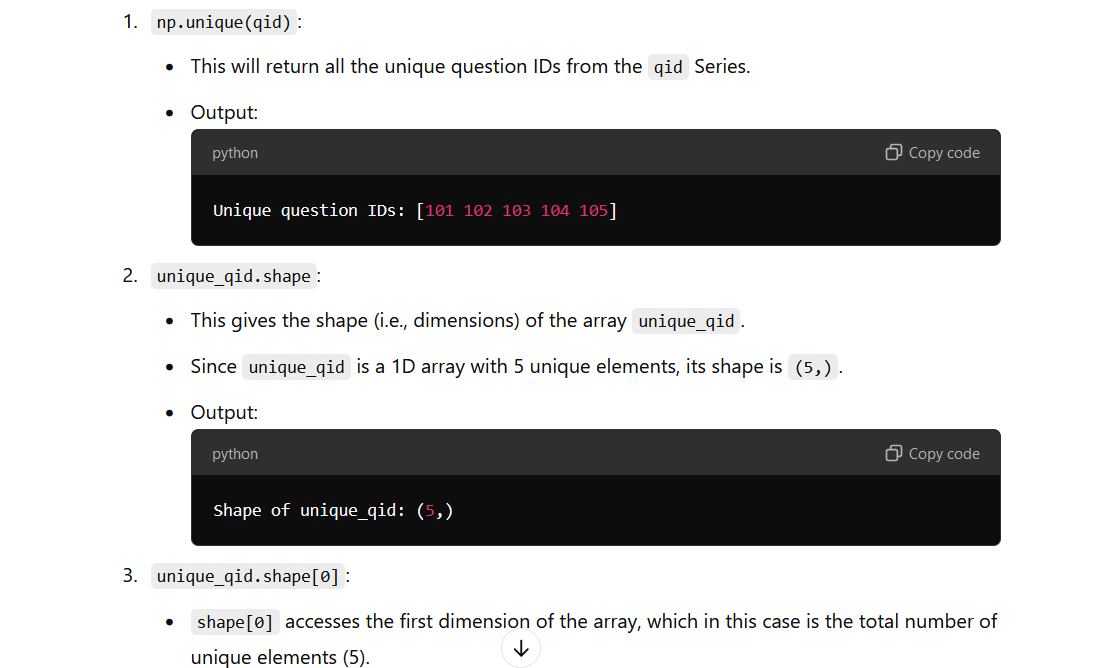

In [16]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of question getting repeated",x[x].shape[0])

Number of unique questions 789801
Number of question getting repeated 13698


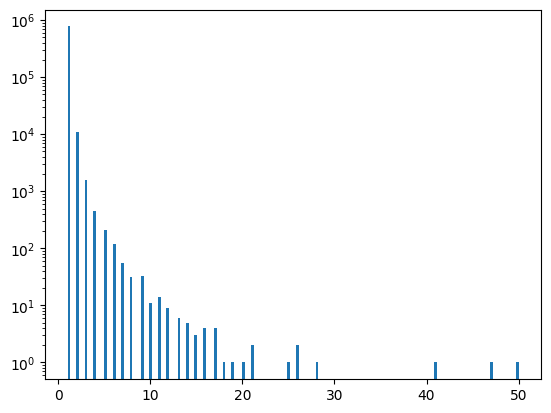

In [17]:
plt.hist(qid.value_counts().values,bins = 160)
plt.yscale("log")
plt.show()

In [18]:
ques_df = new_df[["question1","question2"]]
ques_df.head()

,question1,question2
367724,How can I start my study plan for IAS?,What's the process to start study of IAS?
133701,What's the most effective way to ask a questio...,What is the most effective way to write a Quor...
7129,Why do people cheat on their partners?,Do you want to know if your spouse is cheating...
199769,Why did Trump win?,Why did Donald Trump win the election?
172025,What does Shiva's cosmic dance mean?,Is Lord Ganesha a cosmic Leader?


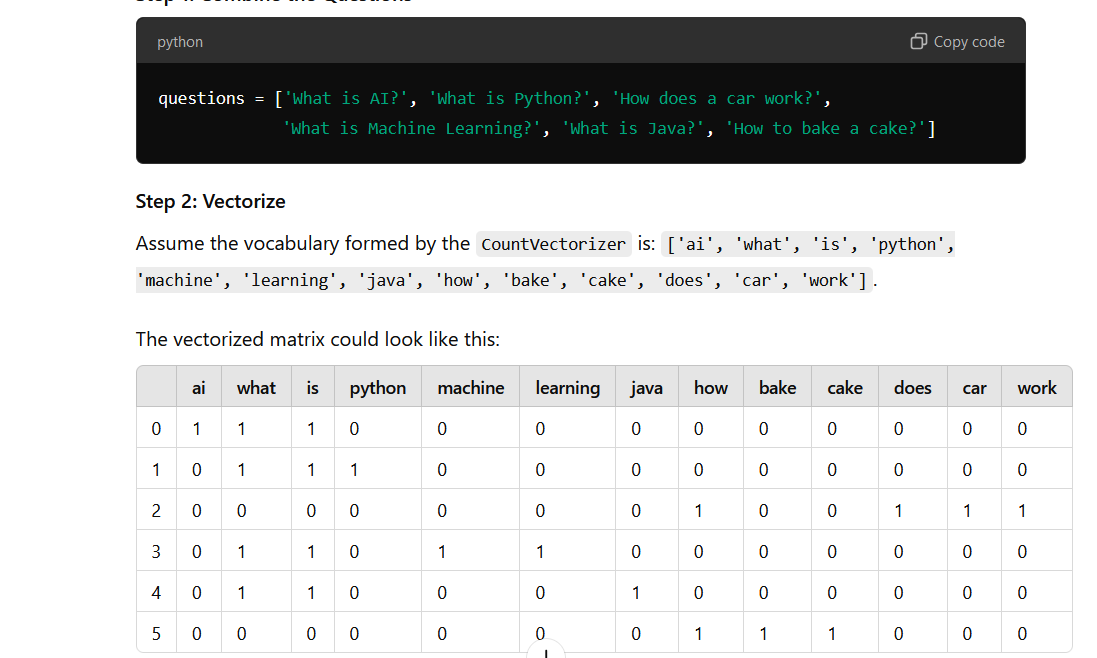

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [20]:
import sklearn

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#merging the text
question = list(ques_df["question1"] + list(ques_df["question2"]))


In [22]:
cv = CountVectorizer(max_features=3000)

In [23]:
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [24]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df =  pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(3000, 6000)

In [25]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
367724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7129,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,0,0
199769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# now i am doing basic approach to solve the problem by using RandomForest and XGboost Algoritham

In [26]:
temp_df["is_duplicate"] = new_df["is_duplicate"]

In [27]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
367724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
133701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7129,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
199769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
temp_df.shape

(3000, 6001)

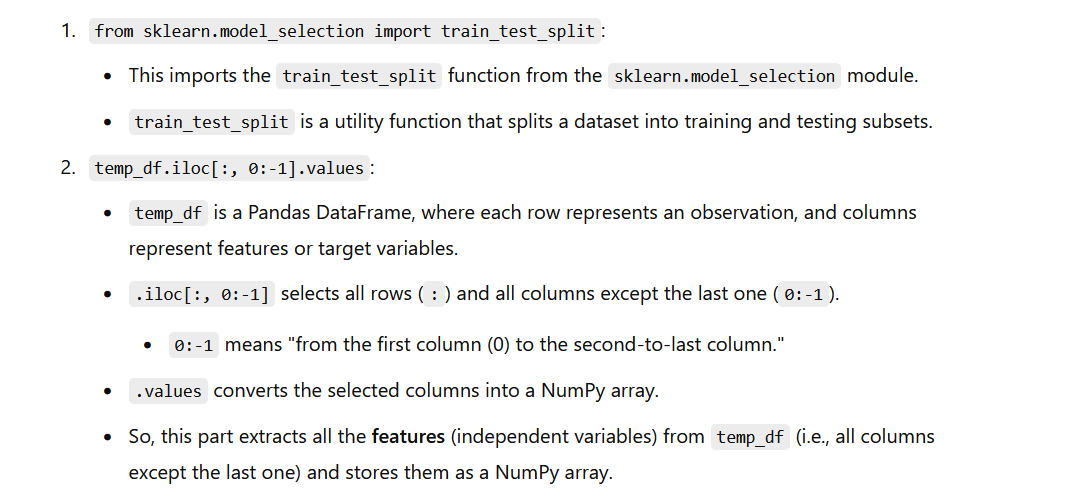

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [30]:
print(y_train)

[0 0 1 ... 0 0 1]


In [31]:
# Check the unique values in y_train
print(np.unique(y_train))


[0 1]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.6716666666666666

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.6516666666666666

#New featuers introduction for better results

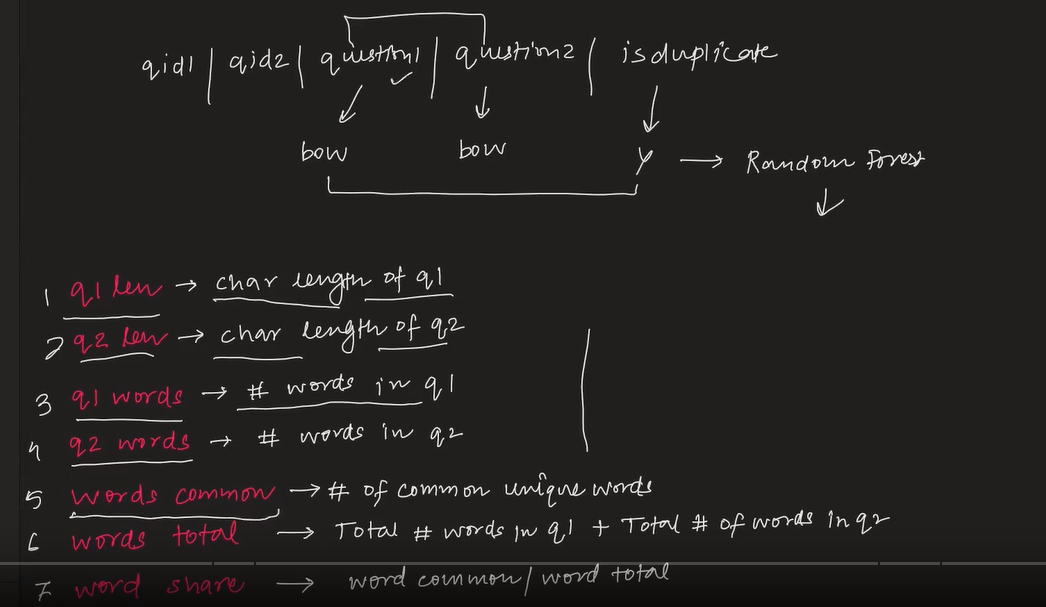

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("q_quora.csv")

In [37]:
df.shape

(404351, 13)

In [38]:
df.drop(df.columns[6:], axis=1, inplace=True)

In [39]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [40]:
# Apply a function to convert all non '0'/'1' values to 0 and convert the result to an integer
df['is_duplicate'] = df['is_duplicate'].apply(lambda x: 0 if str(x) not in ['0', '1'] else int(x))

# Check the unique values after cleaning
print(df['is_duplicate'].unique())

[0 1]


In [41]:
new_df = df.sample(30000,random_state=2)

In [42]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [43]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [44]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [45]:
new_df.duplicated().sum()

0

#Distribution of duplicated and non duplicated question

In [46]:
print(new_df["is_duplicate"].value_counts())

is_duplicate
0    18924
1    11076
Name: count, dtype: int64


In [47]:
print((new_df["is_duplicate"].value_counts()/new_df["is_duplicate"].count())*100)

is_duplicate
0    63.08
1    36.92
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

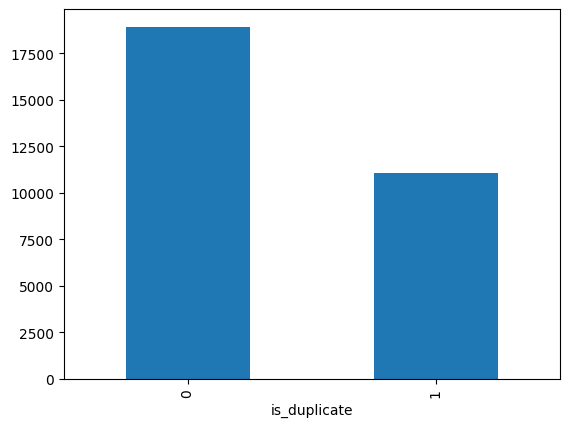

In [48]:
new_df["is_duplicate"].value_counts().plot(kind="bar")

In [49]:
qid = pd.Series(new_df["qid1"].tolist() + new_df["qid2"].tolist())

In [50]:
print("number of unique questions",np.unique(qid).shape[0])

number of unique questions 59795


In [51]:
x = qid.value_counts()>1
print("number of question getting repeated",x[x].shape[0])

number of question getting repeated 176


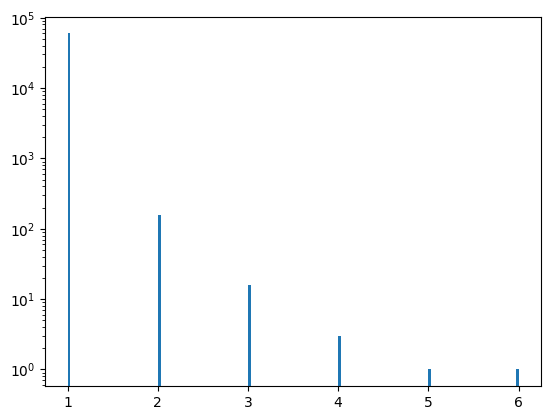

In [52]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

#New features creations to improve the accuracy matrics

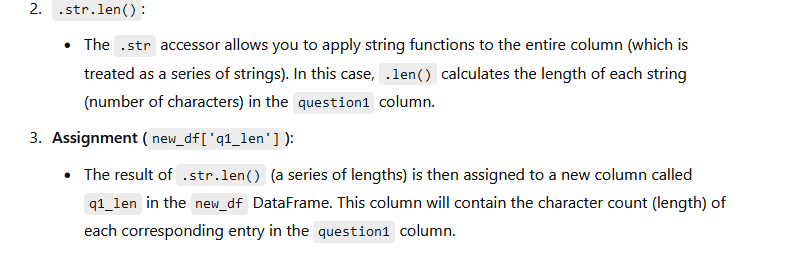

In [53]:
new_df["q1_len"] = new_df["question1"].str.len()

In [54]:
new_df["q2_len"] = new_df["question2"].str.len()

In [55]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [56]:
new_df["q1_num_words"] = new_df["question1"].apply(lambda row: len(row.split(" ")))

In [57]:
new_df["q2_num_words"] = new_df["question2"].apply(lambda row: len(row.split(" ")))

In [58]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [59]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row["question1"].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row["question2"].split(" ")))
  return len(w1 & w2)

In [60]:
new_df["word_common"] = new_df.apply(common_words, axis =1)

In [61]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [62]:
new_df.shape

(30000, 11)

In [63]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
  return (len(w1) + len(w2))

In [64]:
new_df["word_total"] = new_df.apply(total_words, axis=1)

In [65]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [66]:
new_df.shape

(30000, 12)

In [67]:
new_df["word_share"] = round(new_df["word_common"]/new_df["word_total"],2)

In [68]:
new_df.shape

(30000, 13)

#EDA FOR NEW FEATURES.

minimum characters 2
maximum characters 332
avarage number of the characters 59


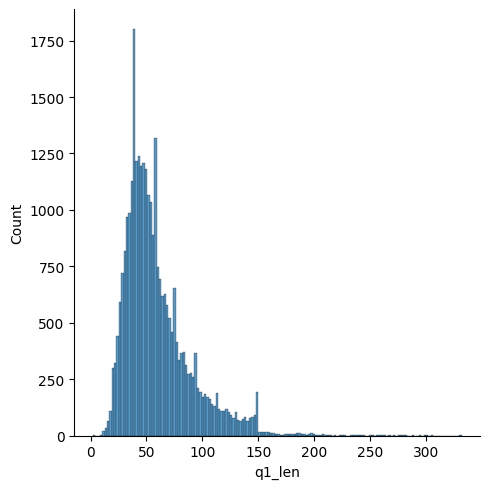

In [70]:
sns.displot(new_df["q1_len"])
print("minimum characters" ,new_df["q1_len"].min())
print("maximum characters" ,new_df["q1_len"].max())
print("avarage number of the characters", int(new_df["q1_len"].mean()))

minimum number of words 3
maximum number of words 1151
avrage number of length 59


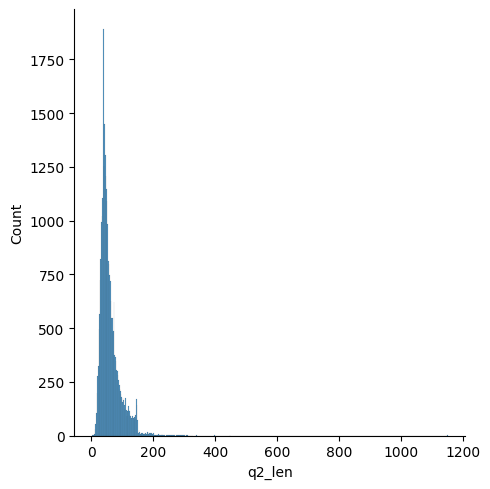

In [72]:
sns.displot(new_df["q2_len"])
print("minimum number of words" ,new_df["q2_len"].min())
print("maximum number of words", new_df["q2_len"].max())
print("avrage number of length", int(new_df["q2_len"].mean()))

minimum words 1
maximum words 63
average num of words 10


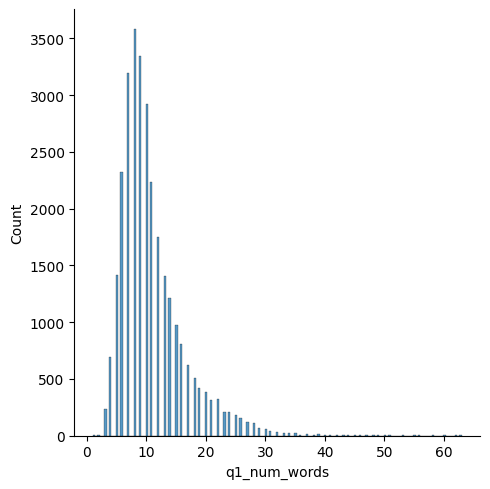

In [73]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


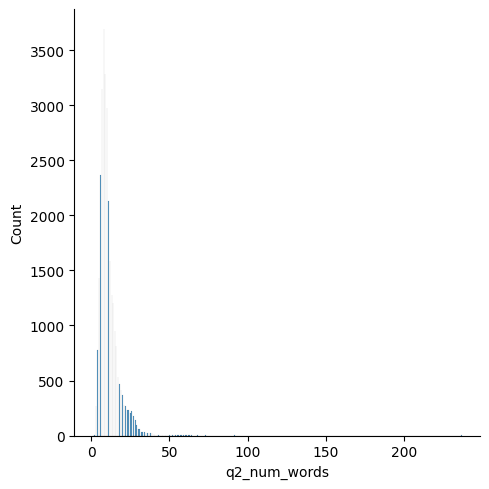

In [74]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

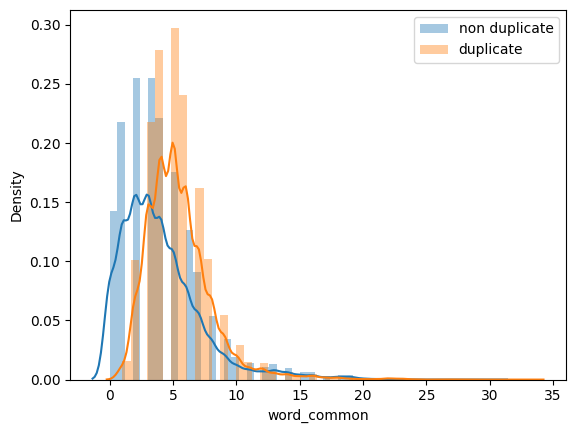

In [80]:
sns.distplot(new_df[new_df["is_duplicate"]==0]["word_common"], label="non duplicate")
sns.distplot(new_df[new_df["is_duplicate"]==1]["word_common"], label="duplicate")
plt.legend()
plt.show()

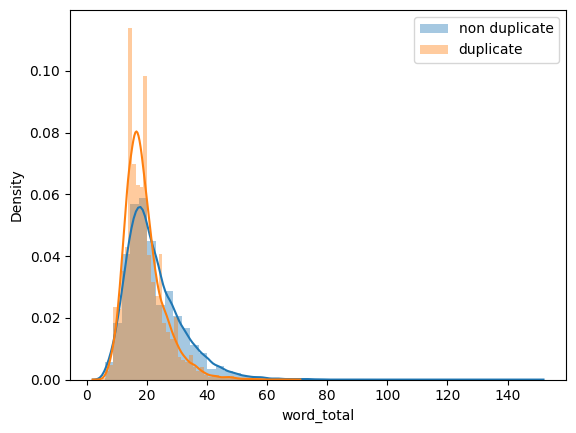

In [81]:
sns.distplot(new_df[new_df["is_duplicate"]==0]["word_total"], label="non duplicate")
sns.distplot(new_df[new_df["is_duplicate"]==1]["word_total"], label="duplicate")
plt.legend()
plt.show()

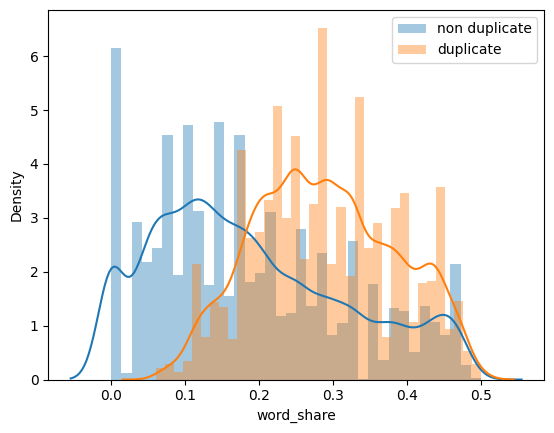

In [82]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [83]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [84]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
#merge q1 and q2
questions = list(ques_df["question1"]) + list(ques_df["question2"])
cv = CountVectorizer(max_features=3000)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

In [86]:
temp_df1 = pd.DataFrame(q1_arr,index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index= ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [87]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7683333333333333